## Part 1.7 - Adam optimizer
#### *Pol Roca Llaberia*

In this experiment we will compare the performance of the model with two different optimizers: the baseline Stochastic Gradient Descent and Adan. Adam is a state of the art strategy for regulating the speed of learning (and actually acceleration as well, by analogy). It is similar to RMSProp in that it computes the gradient by estimation of the previously accumulated gradients, but Adam goes further and also *adapts* the momentum using that strategy.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
N = 300

In [4]:
X_train = X_train[:N]
y_train = y_train[:N]
X_test = X_test[:2500]
y_test = y_test[:2500]

# Make sure images have shape (28, 28, 1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [5]:
print(X_train.shape)
print(X_test.shape)
np.unique(y_test, return_counts=True)

(300, 28, 28, 1)
(2500, 28, 28, 1)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([219, 287, 276, 254, 275, 221, 225, 257, 242, 244]))

In [6]:
def build_model():
    model = models.Sequential()
    model.add(layers.Conv2D(20, (5, 5), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(num_classes))
    return model

In [7]:
model_baseline = build_model()
model_adam = build_model()
print(model_adam.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 20)        520       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 20)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2880)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                28810     
Total params: 29,330
Trainable params: 29,330
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
model_baseline.compile(optimizer='SGD',
                       loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                       metrics=['accuracy'])

model_adam.compile(optimizer='adam',
                   loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                   metrics=['accuracy'])

Make both models start with the same weights

In [9]:
model_baseline.save_weights('initial.h5')
model_adam.load_weights('initial.h5')

In [10]:
histories = []
metrics = []
epochs = 50

for model in [model_baseline, model_adam]:
    history = model.fit(X_train, 
                        y_train, 
                        epochs=epochs, 
                        batch_size=32, 
                        validation_data=(X_test, y_test), 
                        verbose=1)
    histories.append(history.history)
    metrics.append(model.evaluate(X_test,  y_test))

Epoch 1/50
10/10 [==============================] - 30s 84ms/step - loss: 583.9633 - accuracy: 0.0928 - val_loss: 2.2979 - val_accuracy: 0.0984
Epoch 2/50
10/10 [==============================] - 0s 27ms/step - loss: 2.2899 - accuracy: 0.0966 - val_loss: 2.2476 - val_accuracy: 0.1352
Epoch 3/50
10/10 [==============================] - 0s 27ms/step - loss: 2.2433 - accuracy: 0.1308 - val_loss: 2.2178 - val_accuracy: 0.1724
Epoch 4/50
10/10 [==============================] - 0s 27ms/step - loss: 2.0918 - accuracy: 0.2358 - val_loss: 2.1540 - val_accuracy: 0.3112
Epoch 5/50
10/10 [==============================] - 0s 26ms/step - loss: 1.8328 - accuracy: 0.4487 - val_loss: 2.1002 - val_accuracy: 0.2336
Epoch 6/50
10/10 [==============================] - 0s 26ms/step - loss: 1.6582 - accuracy: 0.4639 - val_loss: 1.7997 - val_accuracy: 0.4204
Epoch 7/50
10/10 [==============================] - 0s 26ms/step - loss: 1.1935 - accuracy: 0.6295 - val_loss: 5.1070 - val_accuracy: 0.3392
Epoch 8/50

In [11]:
for loss, acc in np.round(metrics, 2):
    print(f'loss: {loss:.2f} accuracy: {acc:.2f}')

loss: 3.48 accuracy: 0.62
loss: 7.07 accuracy: 0.72


In [12]:
def plot_curves(history, axes, title=''):
    # plot accuracy
    acc = history['accuracy']
    val_acc = history['val_accuracy']
    epochs = range(1, len(acc)+1)

    ax = axes[0]
    ax.plot(epochs, acc, 'b', label='Training Acc')
    ax.plot(epochs, val_acc, 'r', label='Validation Acc')
    ax.set_title('Accuracy curves | ' + title)
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Accuracy')
    ax.grid(alpha=0.4)
    ax.legend()

    # plot validation loss
    loss = history['loss']
    val_loss = history['val_loss']

    ax = axes[1]
    ax.plot(epochs, loss, 'b', label='Training loss')
    ax.plot(epochs, val_loss, 'r', label='Validation loss')
    ax.set_title('Loss curves | ' + title)
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.grid(alpha=0.4)
    ax.legend()

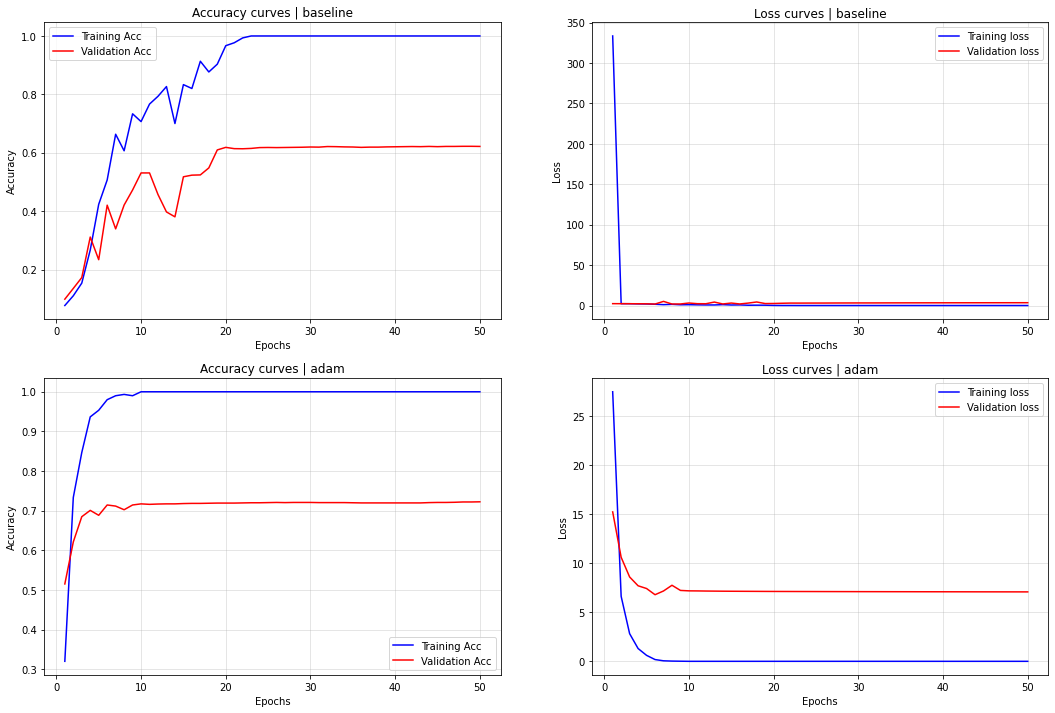

In [13]:
fig, axes = plt.subplots(len(histories), 2, figsize=(18, 6*len(histories)))

plot_curves(histories[0], axes[0], 'baseline')
plot_curves(histories[1], axes[1], 'adam')

plt.show()

### Observations

By looking at the plots of accuracy curves we can observe that the model with Adam reaches a stable accuracy faster than the model optimized with SGD. Regarding the validation loss, the curves for the second optimizer are also smoother. 

Adam seems to reach a better minimum since the final accuracy is increased with it. Besides, there is an interesting detail with its validation loss. If we take a look at the last plot, we cannot realize that the validation loss is actually high because of the scale of the plot. However, if we look at the result from the cell where the models are evaluated we can clearly see that the second model ends up with a validation loss twice as greater as the baseline model, even though the accuracy is better. 

A possible explanation to that behaviour is that the model with Adam predicts more images correctly (hence the better accuracy) but to the badly classified instances it makes very confident predictions on labels that are wrong. This overconfidence on the wrong predictions could inflate the loss that ends up being higher than that of the baseline model, which maybe makes more ambiguous predictions but the error is less exagerated.



---